## General instructions

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel/runtime** (Colab: in the menubar, select *Runtime*$\rightarrow$*Factory Reset Runtime*; Jupyter: in the menubar, select *Kernel*$\rightarrow$*Restart*) and then **run all cells** (Colab: in the menubar, select *Runtime*$\rightarrow$*Run all*; Jupyter: in the menubar, select *Cell*$\rightarrow$*Run All*).

Make sure you fill in any place that says `YOUR CODE HERE` or `"YOUR ANSWER HERE"`, as well as the list of the group members in the following cell.

Enter here the *Group Name* and the list of *Group Members*.

`Doi eletronics`

`Burco Lorenzo, Persello Riccardo`

In order to be able to have an evaluation DO NOT delete/cut the cells with code and answers. Once you have finished you can downolad the notebook (Colab: in the menubar, select *File*$\rightarrow$*Download .ipynb*; Jupyter: in the menubar, select *File*$\rightarrow$*Download as*$\rightarrow$*Notebook (.ipynb)*) and upload as an assignment on the e-learning platform.

The following cell will load the Google Drive extension for the current notebook, when the variable `MOUNT` is `True`. This allow you to mount the Google Drive filesystem for file persistence. The mountpoint will be `/content/gdrive`.
Furthermore, it will set the `PATH` variable, from now on, so that if you have to refer to external files you could do that by writing:

```python
os.path.join(PATH, filename)
```

This will append the filename after the specific PATH.

In [29]:
import os
MOUNT = False
if 'google.colab' in str(get_ipython()) and MOUNT:
    from google.colab import drive
    drive.mount('/content/gdrive')
    PATH = '/content/gdrive/MyDrive'
else:
    PATH = '.'

# Important warning

**⚠️ avoid copying, removing or modifying test cells, if you do that your assignment might be graded wrongly ⚠️**

---

# Preamble

`scipy.stats` is a library for statistical analysis built for `numpy` arrays. We will use it to make and check some (statistical) hypothesis about data stored in arrays.

# Student $t$-test 

We recall that the Student $t$-test is an inferential statistics that is used to determine if there is a *significant*  difference between the *means* of two groups (samples) which may be related in some features.

The null hypothesis of the test is *H0: the difference in the means of the two samples is 0*, whereas as for the alternative hypothesis you can consider either *H1: the difference in the means of the two samples is not 0* (two-sided test) or *H1: the difference in the means of the two samples is greater (lower) than 0* (one-sided test). You should already be aware of the difference from your Bachelor Statistics course, if not please give a look at your course notes.

In `scipy.stats` the $t$-test is available by means of some different functions: `ttest_rel()` when the samples are related, `ttest_ind()` in the case the samples are independent or `ttest_1samp()` when you have just one sample and a reference value for the mean.

# Exercise 1

You have a file `ages.csv` containing the ages of some persons. Read it in a suitable `np.array` and write down the code to check if we can conlude that the mean age of the persons is the $40$. Please motivate your answer.

avg = 43.11538461538461
p: 0.5552770051946303
The mean passes the t-test.


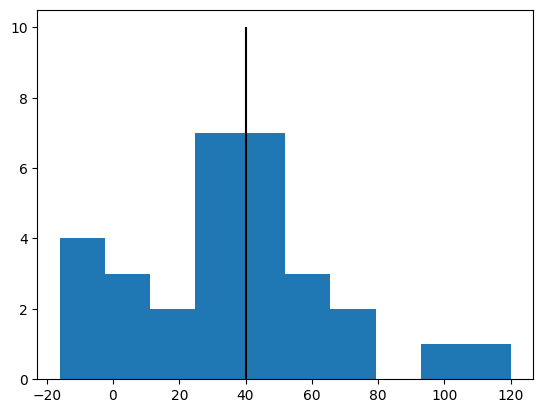

In [30]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy

data = np.genfromtxt('ages.csv', delimiter=',')
filtered = data[data > 0]
print(f"avg = {np.average(filtered)}")
p = scipy.stats.ttest_1samp(filtered, popmean=40).pvalue

print(f"p: {p}")

if p > 0.05:
    print('The mean passes the t-test.')
else:
    print('The mean doesn\'t pass the t-test.')

plt.hist(data)
plt.vlines(40, 0, 10, colors="black")


Describe in some detail the reasoning you did for your decision.

> First of all, we removed all the negative ages in a filtering pass. \
> Since we have a single sample and a reference value for the mean, we used the `scipy.stats.ttest_1samp` function. \
> Then, we extracted the $p$-value from the result and compared it with a 5% baseline. \
> Since it's much higher than 5%, we consider the reference value for the mean as valid.

# Exercise 2

Read the data from the `blood_pressure.csv` data file into the suitable set of `np.array`s. The data refers to a clinical trial of a drug for the treatment of high blood pressure. The relevant data, for our purposes, are the two last columns that contain the blood pressure of a patient before taking the drug and after.

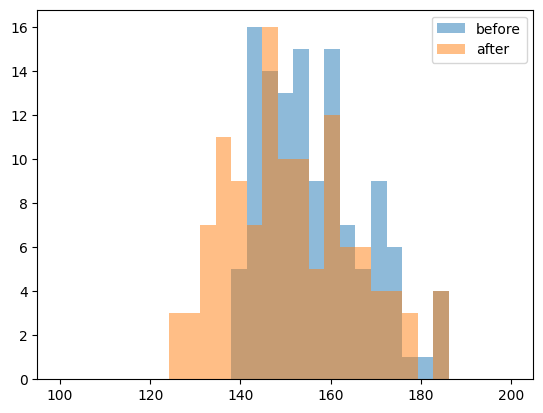

In [31]:
data = np.genfromtxt('blood_pressure.csv', delimiter=',', dtype=str)[1:, :]

bp_before = data[:, -2].astype(np.float32)
bp_after = data[:, -1].astype(np.float32)

bins = np.linspace(100, 200, 30)

plt.hist(bp_before, alpha=0.5, bins=bins, label="before")
plt.hist(bp_after, alpha=0.5, bins=bins, label="after")

plt.legend()

# Exercise 3

Write the code to use the suitable $t$-test variant to check whether the drug has an impact or not in decreasing the blood pressure. Write the code in the next cell and in the following one describe in detail the reasoning that you made.

In [32]:
res = scipy.stats.ttest_rel(bp_before, bp_after)

if res.pvalue < 0.05:
    print("The drug had an impact.")
    if res.statistic > 0:
        print("The drug decreased blood pressure.")
    else:
        print("The drug increased blood pressure.")
else:
    print("The drug did not have an impact.")

The drug had an impact.
The drug decreased blood pressure.


Describe in some detail the reasoning you did for your decision.

> We ran a $t$-test for related samples, since we are working with the same population. \
> We used the $p$-value for deciding whether the drug had an impact or not. \
> Then we checked what kind of impact it had by checking the sign of the $t$-statistic.

# Shapiro-Wilk Test

The *Shapiro-Wilk* test verifies whether a data sample has a Gaussian distribution. Its null hypothesis is *H0: the sample has a Gaussian distribution* whereas the alternative hypothesis is *H1: the sample does not have a Gaussian distribution*.

The test is available in `scipy.stats` under the `shapiro()` function.

# Exercise 4

Check if each of the blood pressure data (i.e., the before the treatment and the after the treatment data) have a Gaussian distribution or not.

In [33]:
p_before = scipy.stats.shapiro(bp_before).pvalue

print(f"p_before = {p_before}")

if p_before > 0.05:
    print("The blood pressure before taking the drug has a Gaussian distribution.")
else:
    print("The blood pressure before taking the drug does not have a Gaussian distribution.")

p_after = scipy.stats.shapiro(bp_after).pvalue

print(f"p_after = {p_after}")

if p_after > 0.05:
    print("The blood pressure after taking the drug has a Gaussian distribution.")
else:
    print("The blood pressure after taking the drug does not have a Gaussian distribution.")

p_before = 0.0004928281414322555
The blood pressure before taking the drug does not have a Gaussian distribution.
p_after = 0.0202285498380661
The blood pressure after taking the drug does not have a Gaussian distribution.


Describe in some detail the reasoning you did for your decision.

> We ran a Shapiro-Wilk test for each of the two samples. \
> Then we compared the $p$-values with a 5% baseline. \
> Since both $p$-values are lower than 5%, we consider the samples as not Gaussian.

# Correlation tests

Correlation tests allow to check if two samples are related. In other words, the hypotheses are as follows: *H0: the two samples are independent* and *H1: there is a dependency between the samples*. In `scipy.stats` they are available under the `pearsonr()`, `spearmanr()` and `kendalltau()` function.

* Pearson correlation measures a linear dependency between the samples
* Spearman and Kendall correlations measure a monotonic relationship (i.e., not necessarily linear)

# Exercise 5

Measure the different correlations between the before and after the treatment blood pressure data and write down your findings.

In [34]:
p_res = scipy.stats.pearsonr(bp_before, bp_after)
s_res = scipy.stats.spearmanr(bp_before, bp_after)
k_res = scipy.stats.kendalltau(bp_before, bp_after)

print(p_res, s_res, k_res)

PearsonRResult(statistic=0.15911810291010756, pvalue=0.08258424647722729) SignificanceResult(statistic=0.15309980094728082, pvalue=0.09503275191903816) SignificanceResult(statistic=0.10258323909760486, pvalue=0.10346647059275761)


Describe in some detail the reasoning you did for your decision.

> The Spearman and Kendall correlations lead to a $p$-value of about 10%, which is higher than 5%. \
> This means that we can't reject the null hypothesis, so we consider the samples as independent under a monotonic relationship. \
> Also, the Pearson correlation leads to a $p$-value of 8%, leading us to think that the samples are independent also under a linear relationship.